In [ ]:
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
import os
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten


In [ ]:
os.listdir('/content/drive/MyDrive/Brain_Tumor')


['Testing', 'Training']

In [ ]:
os.listdir("/content/drive/MyDrive/Brain_Tumor/Testing")

['meningioma', 'notumor', 'pituitary', 'glioma']

In [ ]:
os.listdir("/content/drive/MyDrive/Brain_Tumor/Training")

['meningioma', 'notumor', 'glioma', 'pituitary']

In [ ]:
datadir='/content/drive/MyDrive/Brain_Tumor/Training'

In [ ]:
X_train=[]
y_train=[]
Categories=['glioma', 'pituitary', 'notumor', 'meningioma']
for i in Categories:
  print("Loading............",i)
  path=os.path.join(datadir,i)
  #print(path)
  images=os.listdir(path)
  #print(images)
  for img in images:
    img_path=os.path.join(path,img)
    #print(img_path)
    img_arr=imread(img_path)
    img_resized=resize(img_arr,(150,150,1))
    X_train.append(img_resized)
    y_train.append(Categories.index(i))
  print("Completed.......",i)

Loading............ glioma
Completed....... glioma
Loading............ pituitary
Completed....... pituitary
Loading............ notumor
Completed....... notumor
Loading............ meningioma
Completed....... meningioma


In [ ]:
img_arr.shape

(512, 512, 3)

In [ ]:
print(img_arr)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [ ]:
img_resized.shape

(150, 150, 1)

In [ ]:
img_resized

array([[[0.00000000e+00],
        [1.91285228e-07],
        [1.19860179e-05],
        ...,
        [1.01188030e-04],
        [1.61486289e-06],
        [0.00000000e+00]],

       [[0.00000000e+00],
        [2.52016439e-05],
        [1.59572598e-03],
        ...,
        [3.55164177e-03],
        [5.64735613e-05],
        [0.00000000e+00]],

       [[0.00000000e+00],
        [5.37677425e-05],
        [4.29761809e-03],
        ...,
        [4.46187463e-03],
        [5.82240228e-05],
        [0.00000000e+00]],

       ...,

       [[0.00000000e+00],
        [9.69490914e-05],
        [5.72365085e-03],
        ...,
        [5.56095826e-03],
        [8.42950413e-05],
        [0.00000000e+00]],

       [[0.00000000e+00],
        [1.73721173e-06],
        [9.77025824e-05],
        ...,
        [3.56918208e-03],
        [5.68896295e-05],
        [0.00000000e+00]],

       [[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        ...,
        [1.01188030e-04],
        [1.6148

In [ ]:
X_test=[]
y_test=[]
Categories=['glioma', 'pituitary', 'notumor', 'meningioma']
datadir='/content/drive/MyDrive/Brain_Tumor/Testing'
for i in Categories:
  print("Loading............",i)
  path=os.path.join(datadir,i)
  #print(path)
  images=os.listdir(path)
  #print(images)
  for img in images:
    img_path=os.path.join(path,img)
    #print(img_path)
    img_arr=imread(img_path)
    img_resized=resize(img_arr,(150,150,1))
    X_test.append(img_resized)
    y_test.append(Categories.index(i))
  print("Completed.......",i)

Loading............ glioma
Completed....... glioma
Loading............ pituitary
Completed....... pituitary
Loading............ notumor
Completed....... notumor
Loading............ meningioma
Completed....... meningioma


In [ ]:
import numpy as np
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
X_train.shape

(5529, 150, 150, 1)

In [ ]:
X_test.shape

(1311, 150, 150, 1)

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,1),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=20,batch_size=20)

Epoch 1/20
277/277 [==============================] - 72s 258ms/step - loss: 1.1462 - accuracy: 0.4607
Epoch 2/20
277/277 [==============================] - 67s 242ms/step - loss: 0.7435 - accuracy: 0.7343
Epoch 3/20
277/277 [==============================] - 69s 248ms/step - loss: 0.6463 - accuracy: 0.7661
Epoch 4/20
277/277 [==============================] - 67s 242ms/step - loss: 0.5505 - accuracy: 0.8034
Epoch 5/20
277/277 [==============================] - 68s 247ms/step - loss: 0.4623 - accuracy: 0.8519
Epoch 6/20
277/277 [==============================] - 67s 244ms/step - loss: 0.3719 - accuracy: 0.8870
Epoch 7/20
277/277 [==============================] - 67s 242ms/step - loss: 0.3171 - accuracy: 0.9011
Epoch 8/20
277/277 [==============================] - 69s 248ms/step - loss: 0.2535 - accuracy: 0.9240
Epoch 9/20
277/277 [==============================] - 71s 258ms/step - loss: 0.2237 - accuracy: 0.9322
Epoch 10/20
277/277 [==============================] - 68s 246ms/step - l

In [ ]:
loss,accuracy=model.evaluate(X_test,y_test)
print("LOSS :",loss)
print("Accuracy :",accuracy)

41/41 [==============================] - 4s 104ms/step - loss: 0.3260 - accuracy: 0.8909
LOSS : 0.32604727149009705
Accuracy : 0.8909229636192322


array([[[13, 13, 13],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [13, 13, 13]],

       [[13, 13, 13],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[13, 13, 13],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [15, 15, 15],
        [15, 15, 15],
        [15, 15, 15]],

       ...,

       [[14, 14, 14],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[15, 15, 15],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[15, 15, 15],
        [14, 14, 14],
        [13, 13, 13],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]]], dtype=uint8)
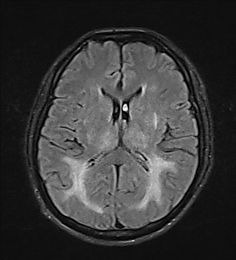

In [ ]:
img=imread('/content/drive/MyDrive/Brain_Tumor/Testing/notumor/Te-noTr_0001.jpg')
img

In [ ]:
img=resize(img,(150,150,1))
img.shape

(150, 150, 1)

In [ ]:
img=img.reshape(1,150,150,1)
img.shape

(1, 150, 150, 1)

In [ ]:
pred=model.predict(img)
pred

1/1 [==============================] - 0s 73ms/step


array([[8.2218819e-20, 1.1989832e-16, 9.9649066e-01, 3.5093082e-03]],
      dtype=float32)

In [ ]:
ind=pred.argmax(axis=1)
ind

array([2])

In [ ]:
Categories[ind.item()]

'notumor'